In [41]:
import pandas as pd
import numpy as np

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weather data/weather.csv')

In [44]:
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [45]:
# See the data type of every columns to know which are numericals and which ar categorical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     25000 non-null  int64  
 1   Date           25000 non-null  object 
 2   Location       25000 non-null  object 
 3   MinTemp        24669 non-null  float64
 4   MaxTemp        24824 non-null  float64
 5   Rainfall       24721 non-null  float64
 6   Evaporation    9432 non-null   float64
 7   Sunshine       6664 non-null   float64
 8   WindGustDir    21543 non-null  object 
 9   WindGustSpeed  21545 non-null  float64
 10  WindDir9am     21928 non-null  object 
 11  WindDir3pm     23267 non-null  object 
 12  WindSpeed9am   24428 non-null  float64
 13  WindSpeed3pm   23770 non-null  float64
 14  Humidity9am    24609 non-null  float64
 15  Humidity3pm    23936 non-null  float64
 16  Pressure9am    20172 non-null  float64
 17  Pressure3pm    20173 non-null  float64
 18  Cloud9

In [46]:
# Total number of null values in every column
df.isna().sum()

Unnamed: 0           0
Date                 0
Location             0
MinTemp            331
MaxTemp            176
Rainfall           279
Evaporation      15568
Sunshine         18336
WindGustDir       3457
WindGustSpeed     3455
WindDir9am        3072
WindDir3pm        1733
WindSpeed9am       572
WindSpeed3pm      1230
Humidity9am        391
Humidity3pm       1064
Pressure9am       4828
Pressure3pm       4827
Cloud9am         10864
Cloud3pm         11185
Temp9am            245
Temp3pm            918
RainToday          279
RISK_MM              0
RainTomorrow         0
dtype: int64

In [47]:
# name of all the columns int the dataset
df.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [48]:
df['Month'] = df['Date'].apply(lambda x: x.split('-')[1])
df['Year'] = df['Date'].apply(lambda x: x.split('-')[0])

In [49]:
df['Month'] = df['Month'].astype('int64')
df['Year'] = df['Year'].astype('int64')

<Axes: xlabel='Pressure3pm', ylabel='WindGustSpeed'>

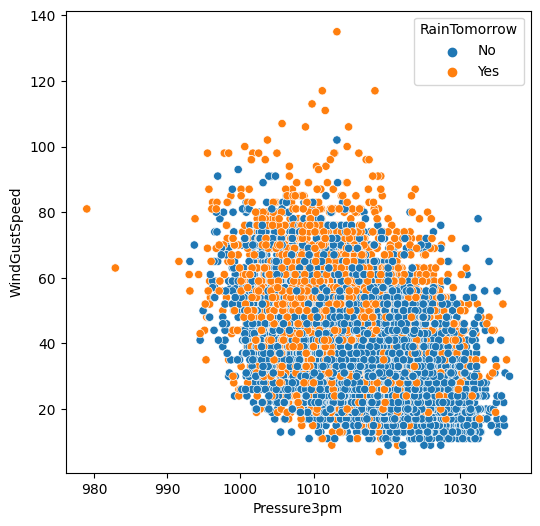

In [50]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='Pressure3pm', y='WindGustSpeed', hue='RainTomorrow')

In [51]:
df.duplicated().value_counts()

False    25000
dtype: int64

In [52]:
df = df.drop(columns=['Unnamed: 0','Date','Evaporation','Sunshine','Cloud9am','Cloud3pm'])

In [53]:
df.shape

(25000, 21)

In [54]:
sel_cols = list(df.select_dtypes(include='object'))

In [55]:
for col in sel_cols:
    print(col)
    print(df[col].value_counts())

Location
Albury           3011
Cobar            2988
NorfolkIsland    2964
Newcastle        2955
CoffsHarbour     2953
NorahHead        2929
BadgerysCreek    2928
Moree            2854
Penrith          1418
Name: Location, dtype: int64
WindGustDir
NNE    1903
SW     1838
NE     1759
E      1590
WSW    1556
S      1553
SSW    1536
ENE    1436
W      1391
SSE    1213
SE     1192
WNW    1144
ESE    1058
N      1049
NW      740
NNW     585
Name: WindGustDir, dtype: int64
WindDir9am
SW     2298
SE     1667
NNE    1612
NE     1604
N      1545
NW     1480
E      1478
SSW    1429
WSW    1398
S      1301
ESE    1148
ENE    1142
SSE    1137
W       976
NNW     878
WNW     835
Name: WindDir9am, dtype: int64
WindDir3pm
SE     2486
NE     2201
S      1710
SW     1573
E      1505
NNE    1495
SSE    1447
ESE    1384
W      1336
SSW    1324
WSW    1285
ENE    1256
N      1214
NW     1206
WNW    1153
NNW     692
Name: WindDir3pm, dtype: int64
RainToday
No     19197
Yes     5524
Name: RainToday, dtype: 

In [56]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from category_encoders import CountEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [58]:
# Separate input and label column
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

In [59]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [60]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (20000, 20)
X_test shape:  (5000, 20)
y_train shape:  (20000,)
y_test shape:  (5000,)


In [61]:
X_train.isna().sum()

Location            0
MinTemp           256
MaxTemp           141
Rainfall          220
WindGustDir      2778
WindGustSpeed    2776
WindDir9am       2451
WindDir3pm       1376
WindSpeed9am      450
WindSpeed3pm      977
Humidity9am       297
Humidity3pm       834
Pressure9am      3875
Pressure3pm      3868
Temp9am           181
Temp3pm           717
RainToday         220
RISK_MM             0
Month               0
Year                0
dtype: int64

In [62]:
ctEn = CountEncoder(normalize=True, cols=sel_cols[:-2])
ctEn.fit(X_train)

X_train = ctEn.transform(X_train)
X_test = ctEn.transform(X_test)

In [63]:
X_train = pd.get_dummies(X_train, columns=["RainToday"], prefix=["Rain_today_"] )
X_test = pd.get_dummies(X_test, columns=["RainToday"], prefix=["Rain_today_"] )

In [68]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,Month,Year,Rain_today__No,Rain_today__Yes
23311,0.11870,12.7,17.2,4.0,0.06250,59.0,0.04495,0.06900,30.0,30.0,...,64.0,1020.6,1017.4,15.1,16.4,8.6,8,2016,0,1
23623,0.05670,19.9,32.9,0.0,0.02370,37.0,0.04575,0.08660,7.0,15.0,...,39.0,NaN,NaN,22.1,31.1,0.0,1,2009,1,0
1020,0.12065,6.4,23.1,0.0,0.07365,30.0,0.06760,0.05245,19.0,13.0,...,41.0,1022.8,1019.6,14.1,21.3,0.0,10,2011,1,0
12645,0.11425,25.0,37.4,0.0,0.07690,44.0,0.06490,0.05965,30.0,20.0,...,26.0,1015.6,1011.9,27.6,35.6,0.0,2,2011,1,0
1533,0.12065,4.2,19.3,0.0,0.04165,22.0,0.12255,0.05745,0.0,7.0,...,57.0,1030.3,1026.1,7.8,19.0,0.6,5,2013,1,0


In [69]:
X_train = X_train.drop(columns=['Rain_today__No'])
X_test = X_test.drop(columns=['Rain_today__No'])

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 23311 to 23654
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         20000 non-null  float64
 1   MinTemp          19744 non-null  float64
 2   MaxTemp          19859 non-null  float64
 3   Rainfall         19780 non-null  float64
 4   WindGustDir      20000 non-null  float64
 5   WindGustSpeed    17224 non-null  float64
 6   WindDir9am       20000 non-null  float64
 7   WindDir3pm       20000 non-null  float64
 8   WindSpeed9am     19550 non-null  float64
 9   WindSpeed3pm     19023 non-null  float64
 10  Humidity9am      19703 non-null  float64
 11  Humidity3pm      19166 non-null  float64
 12  Pressure9am      16125 non-null  float64
 13  Pressure3pm      16132 non-null  float64
 14  Temp9am          19819 non-null  float64
 15  Temp3pm          19283 non-null  float64
 16  RISK_MM          20000 non-null  float64
 17  Month   

In [73]:
knnImpt = KNNImputer(n_neighbors=7)
X_train = knnImpt.fit_transform(X_train)
X_test = knnImpt.transform(X_test)

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
np.where(np.isnan(X_test)== True)

(array([], dtype=int64), array([], dtype=int64))

In [83]:
from sklearn.preprocessing import LabelEncoder

In [85]:
lbEn = LabelEncoder()
y_train = lbEn.fit_transform(y_train)
y_test = lbEn.transform(y_test)

In [86]:
y_train

array([1, 0, 0, ..., 0, 0, 1])

In [87]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (20000, 20)
X_test shape:  (5000, 20)
y_train shape:  (20000,)
y_test shape:  (5000,)


# Building the architencture of ANN model

In [88]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [102]:
import matplotlib.pyplot as plt

In [173]:
model = Sequential()

model.add(Dense(32, activation='relu', input_dim=20))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [174]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
500/500 [==============================] - 4s 6ms/step - loss: 0.3794 - accuracy: 0.8278 - val_loss: 0.2034 - val_accuracy: 0.9245
Epoch 2/100
500/500 [==============================] - 3s 5ms/step - loss: 0.1612 - accuracy: 0.9446 - val_loss: 0.0853 - val_accuracy: 0.9678
Epoch 3/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0781 - accuracy: 0.9731 - val_loss: 0.0407 - val_accuracy: 0.9845
Epoch 4/100
500/500 [==============================] - 2s 3ms/step - loss: 0.0480 - accuracy: 0.9834 - val_loss: 0.0270 - val_accuracy: 0.9880
Epoch 5/100
500/500 [==============================] - 1s 3ms/step - loss: 0.0366 - accuracy: 0.9873 - val_loss: 0.0287 - val_accuracy: 0.9880
Epoch 6/100
500/500 [==============================] - 2s 3ms/step - loss: 0.0296 - accuracy: 0.9896 - val_loss: 0.0173 - val_accuracy: 0.9940
Epoch 7/100
500/500 [==============================] - 2s 3ms/step - loss: 0.0244 - accuracy: 0.9918 - val_loss: 0.0151 - val_accuracy: 0.9948

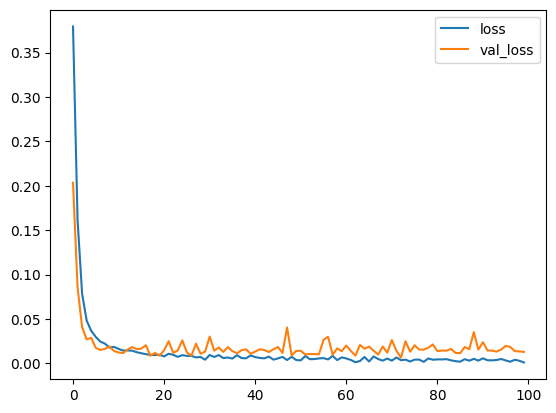

In [175]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

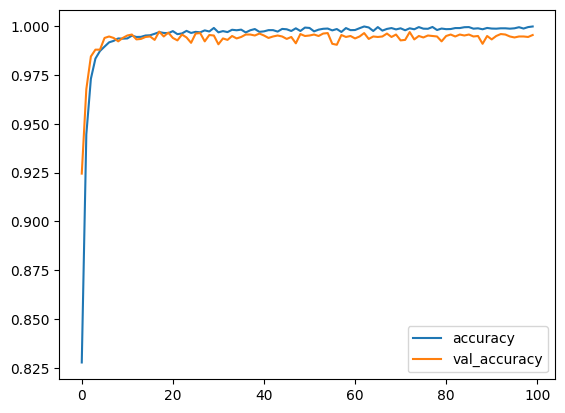

In [176]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

In [177]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [178]:
y_pred = model.predict(X_test)

157/157 [==============================] - 1s 3ms/step


In [179]:
y_pred = (y_pred > 0.5)

In [180]:
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [181]:
score = accuracy_score(y_test, y_pred)
print("Model Accuracy:", score)

Model Accuracy: 0.9968


Text(0.5, 23.52222222222222, 'Predicted label')

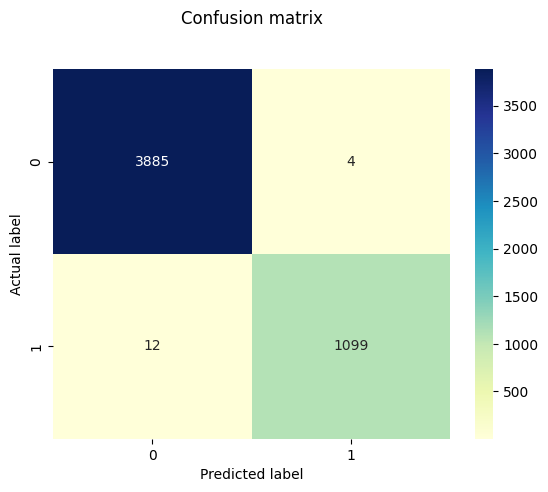

In [182]:
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [184]:
model.save("/content/drive/MyDrive/Colab Notebooks/ANN/Rainfall_predictor.h5")